In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df= pd.read_csv('/content/train.csv')

In [3]:
Data_path = '/content/train.csv'

In [4]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
#Cell  Preprocessing and Data Cleaning

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

#drop duplicates
df = df.drop_duplicates()

duplicates_all = df[df.duplicated(keep=False)]
print(duplicates_all)

#handle missing variables
print(df.isnull().sum())
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df['Pclass'].fillna('Unknown', inplace=True)




Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


/tmp/ipython-input-4145763842.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-4145763842.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

In [7]:
print(df.columns)


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [8]:
#Feature Engeneering

# FamilySize & IsAlone
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)



In [9]:
# Feature Selection

# selected features of interest
features = ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'FamilySize', 'IsAlone']
X = df[features]
y = df['Survived']
X.head()



,Pclass,Sex,Age,Fare,Embarked,FamilySize,IsAlone
0,3,male,22.0,7.2500,S,2,0
1,1,female,38.0,71.2833,C,2,0
2,3,female,26.0,7.9250,S,1,1
3,1,female,35.0,53.1000,S,2,0
4,3,male,35.0,8.0500,S,1,1


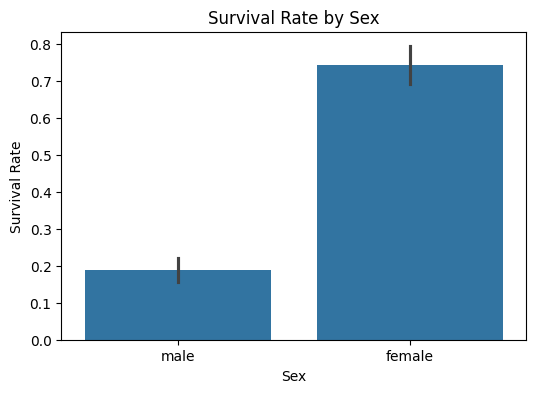

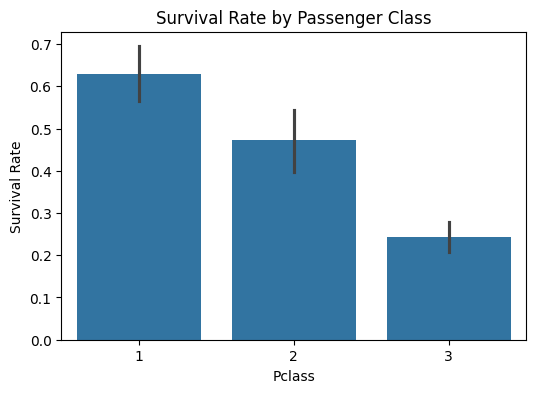

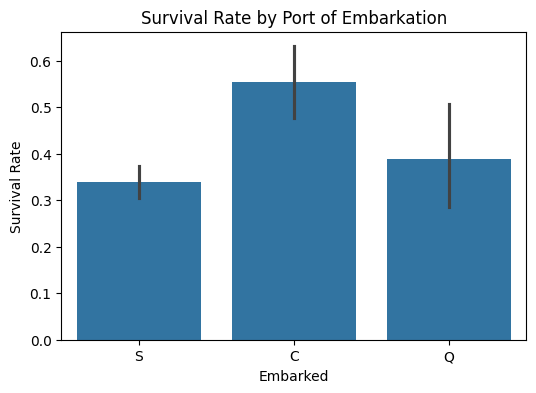

In [10]:
#EDA

import seaborn as sns
import matplotlib.pyplot as plt

# Sex vs Survival
plt.figure(figsize=(6,4))
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Sex')
plt.ylabel('Survival Rate')
plt.show()

# Passenger Class vs Survival
plt.figure(figsize=(6,4))
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

# Embarked vs Survival
plt.figure(figsize=(6,4))
sns.barplot(x='Embarked', y='Survived', data=df)
plt.title('Survival Rate by Port of Embarkation')
plt.ylabel('Survival Rate')
plt.show()


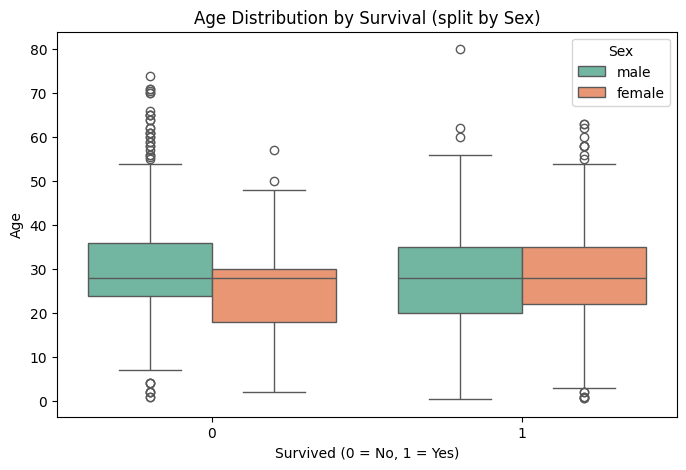

/tmp/ipython-input-3945395510.py:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


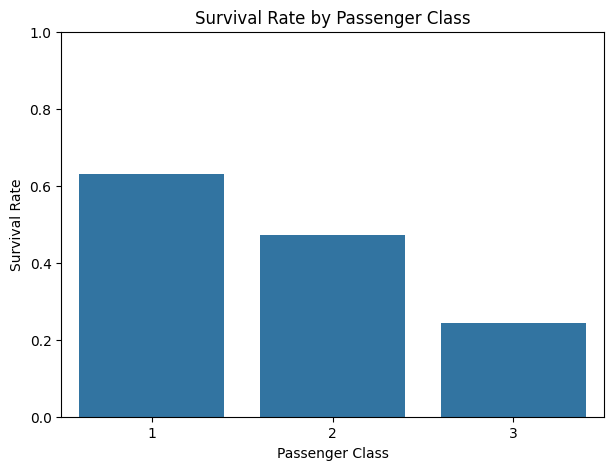

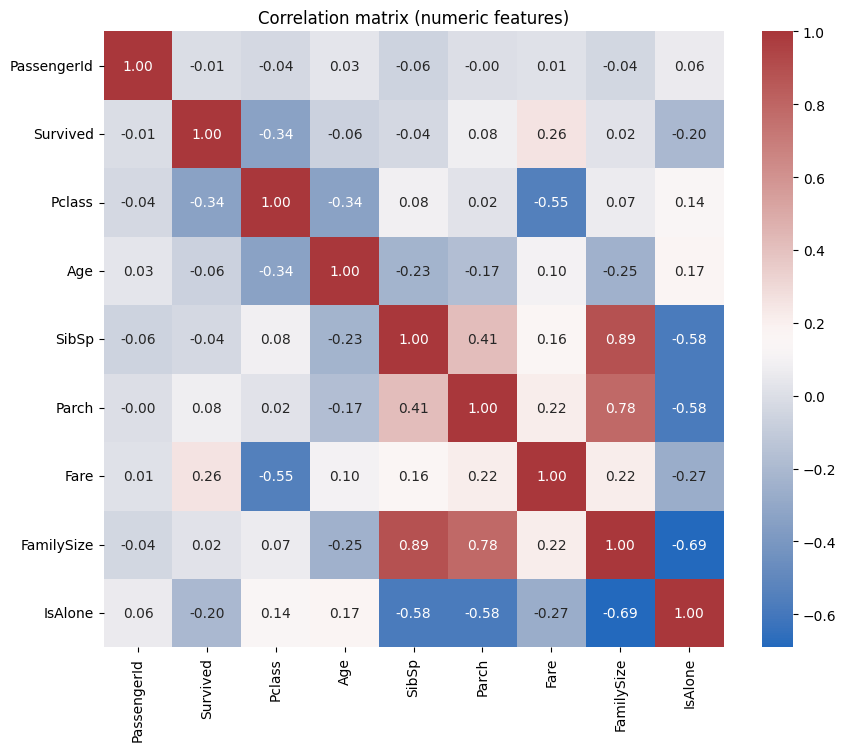

In [11]:
#Relational Plot

plt.figure(figsize=(8,5))
sns.boxplot(
    x='Survived',
    y='Age',
    data=df,
    hue='Sex',       # optional: shows male/female side by side
    palette='Set2'
)
plt.title('Age Distribution by Survival (split by Sex)')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.show()

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(7,5))
sns.barplot(
    x='Pclass',
    y='Survived',
    data=df,
    estimator=np.mean,   # calculate survival rate
    ci=None              # removes error bars for simplicity
)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.ylim(0,1)
plt.show()

# Correlation heatmap
plt.figure(figsize=(10,8))
num_df = df.select_dtypes(include=['float64','int64'])
cm = num_df.corr()
sns.heatmap(cm, annot=True, fmt='.2f', cmap='vlag')
plt.title('Correlation matrix (numeric features)')
plt.show()


In [12]:
# Train Data

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)
X_train.shape, X_val.shape



((712, 7), (179, 7))

In [13]:
# Apply to the training data

df_fixed = df.copy()
df_fixed['Sex'] = df_fixed['Sex'].map({'female': 0, 'male': 1})
df_fixed['Embarked'] = df_fixed['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

features = ['Pclass','Sex','Age','Fare','Embarked','FamilySize','IsAlone']
X = df_fixed[features]
y = df_fixed['Survived']

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_val.shape)


(712, 7) (179, 7)


In [14]:
#Training

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)
model.fit(X_train, y_train)

y_pred = model.predict(X_val)
print("Validation accuracy:", accuracy_score(y_val, y_pred))


Validation accuracy: 0.8324022346368715


In [15]:
def clean_data(df):
    df['Age'] = df['Age'].fillna(df['Age'].median())
    df['Fare'] = df['Fare'].fillna(df['Fare'].median())
    df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

    df['Sex'] = df['Sex'].map({'female': 0, 'male': 1})
    df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

    df = df.drop(columns=['Cabin', 'Ticket', 'Name'])
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
    df['IsAlone'] = (df['FamilySize'] == 1).astype(int)
    return df


In [16]:
# Define the test dataset
test = pd.read_csv('/content/test.csv')

test_easy = clean_data(test.copy())
X_test = test_easy[features]


In [17]:
#Test data

train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

def clean_data(df):
    # Fill missing values
    df['Age'] = df['Age'].fillna(train['Age'].median())
    df['Fare'] = df['Fare'].fillna(train['Fare'].median())
    df['Embarked'] = df['Embarked'].fillna(train['Embarked'].mode()[0])

    # Encode categorical
    df['Sex'] = df['Sex'].map({'female': 0, 'male': 1})
    embark_map = {'C': 0, 'Q': 1, 'S': 2}
    df['Embarked'] = df['Embarked'].map(embark_map)

    # Drop extra columns
    df = df.drop(columns=['Cabin', 'Ticket', 'Name'])

    # Feature engineering
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
    df['IsAlone'] = (df['FamilySize'] == 1).astype(int)
    return df

# Apply to test set
test_easy = clean_data(test.copy())
X_test = test_easy[features]


In [18]:
test_pred = model.predict(X_test)

submission = pd.DataFrame({
    'PassengerId': test_easy['PassengerId'],
    'Survived': test_pred.astype(int)
})

submission.head()


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,1


In [19]:
# Target balance
print(df['Survived'].value_counts(normalize=True))

# Average survival by Sex
print(df.groupby('Sex')['Survived'].mean())

# Average survival by Pclass
print(df.groupby('Pclass')['Survived'].mean())


Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


In [20]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

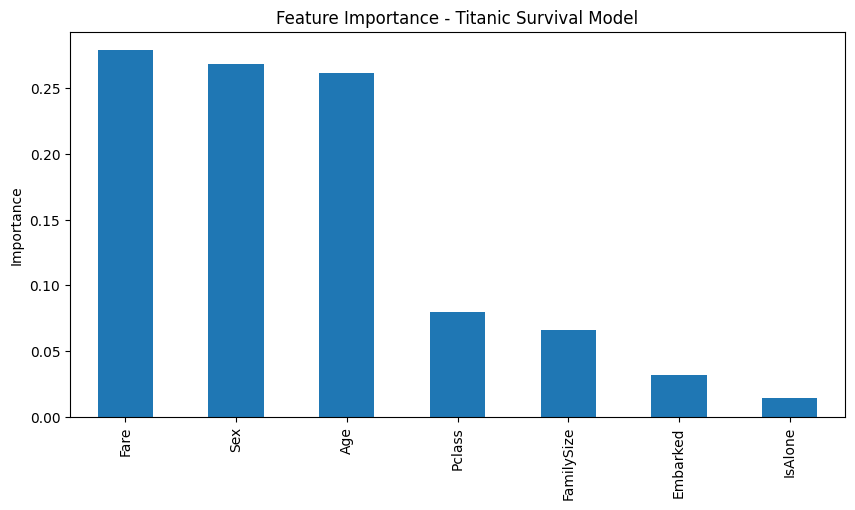

In [21]:
# For tree models
importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10,5))
importances.plot(kind='bar')
plt.title('Feature Importance - Titanic Survival Model')
plt.ylabel('Importance')
plt.show()

In [22]:
summary_stats = {
    "overall_survival_rate": df['Survived'].mean(),
    "survival_by_sex": df.groupby('Sex')['Survived'].mean().to_dict(),
    "survival_by_class": df.groupby('Pclass')['Survived'].mean().to_dict(),
    "feature_importance": importances.to_dict()
}

summary_stats


{'overall_survival_rate': np.float64(0.3838383838383838),
 'survival_by_sex': {'female': 0.7420382165605095,
  'male': 0.18890814558058924},
 'survival_by_class': {1: 0.6296296296296297,
  2: 0.47282608695652173,
  3: 0.24236252545824846},
 'feature_importance': {'Fare': 0.2787525063618419,
  'Sex': 0.26835244202482245,
  'Age': 0.2613733470116901,
  'Pclass': 0.07943369586647575,
  'FamilySize': 0.06611413695299172,
  'Embarked': 0.03192273087855411,
  'IsAlone': 0.014051140903623966}}

In [24]:
import os
from openai import OpenAI

client = OpenAI(api_key="Input API Key Here")


In [25]:
test = client.models.list()
print([m.id for m in test.data][:3])  # should return a list of model IDs


['gpt-4-0613', 'gpt-4', 'gpt-3.5-turbo']


In [27]:
#LLM
prompt = "Summarize this dataset's trends in simple terms."
response = client.chat.completions.create(
    model="gpt-4",
    messages=[
        {"role": "system", "content": "You are a helpful data analysis assistant."},
        {"role": "user", "content": prompt}
    ],
    max_tokens=250
)

print(response.choices[0].message.content)


As an AI, I need specific data. Could you please provide me with the dataset that you want me to analyze and summarize?


In [28]:
# define target variable
y = df['Survived']

#define feature matrix — drop the target column
X = df.drop('Survived', axis=1)


In [38]:
#  preprocessing

# Drop text columns if they still exist
X_train = X_train.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1, errors='ignore')
X_val = X_val.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1, errors='ignore')

# Convert 'Sex' to numeric
if 'Sex' in X_train.columns:
    X_train['Sex'] = X_train['Sex'].map({'male': 0, 'female': 1})
    X_val['Sex'] = X_val['Sex'].map({'male': 0, 'female': 1})

# Convert 'Embarked' to numeric
if 'Embarked' in X_train.columns:
    X_train['Embarked'] = X_train['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
    X_val['Embarked'] = X_val['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})


Non-numeric columns: []


In [45]:
# encode sex in the main df
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# drop text columns from df
df = df.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1, errors='ignore')

#split into X and y
y = df['Survived']
X = df.drop('Survived', axis=1)


In [46]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [47]:
X_train = X_train.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1, errors='ignore')
X_val = X_val.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1, errors='ignore')


In [48]:
print(X_train.dtypes)


Pclass          int64
Sex             int64
Age           float64
SibSp           int64
Parch           int64
Fare          float64
Embarked        int64
FamilySize      int64
IsAlone         int64
dtype: object


In [49]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)